In [ ]:
!kaggle datasets download -d jainaru/thyroid-disease-data
!unzip thyroid-disease-data.zip

Dataset URL: https://www.kaggle.com/datasets/jainaru/thyroid-disease-data
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/3.03k [00:00<?, ?B/s]
100% 3.03k/3.03k [00:00<00:00, 4.81MB/s]
Archive:  thyroid-disease-data.zip
  inflating: Thyroid_Diff.csv        


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
import warnings
warnings.simplefilter(action= "ignore",category=FutureWarning)

In [ ]:
df=pd.read_csv("Thyroid_Diff.csv")

In [ ]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
df.shape

(383, 17)

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


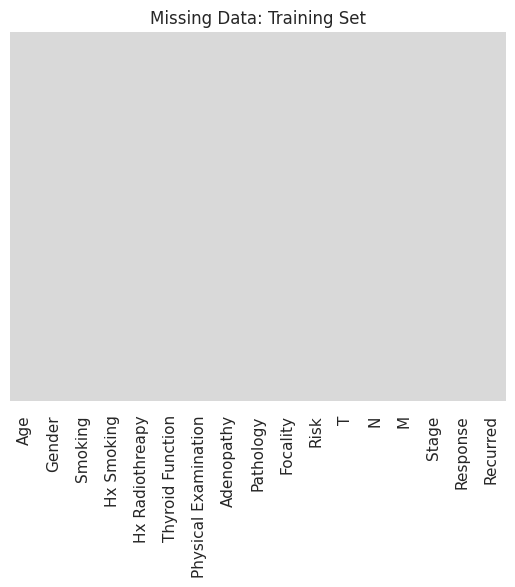

In [ ]:
# Heatmap
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (19, 17)


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:

# Rename the columns for better understanding
df.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis',
                  'Response' : 'Treatment Response'}, inplace=True)

In [ ]:
df.dtypes

,0
Age,int64
Gender,object
Smoking,object
Smoking History,object
Radiotherapy History,object
Thyroid Function,object
Physical Examination,object
Adenopathy,object
Pathology,object
Focality,object


## **visulization of data**

In [ ]:
df['Recurred'].value_counts()

,count
Recurred,
No,256
Yes,108


<Axes: xlabel='count', ylabel='Recurred'>

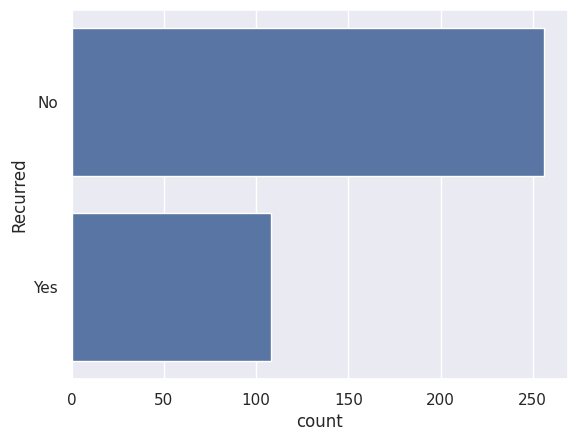

In [ ]:
sns.countplot(df, y="Recurred")

In [ ]:
df['Physical Examination'].value_counts()

,count
Physical Examination,
Multinodular goiter,135
Single nodular goiter-right,127
Single nodular goiter-left,88
Normal,7
Diffuse goiter,7


<Axes: ylabel='count'>

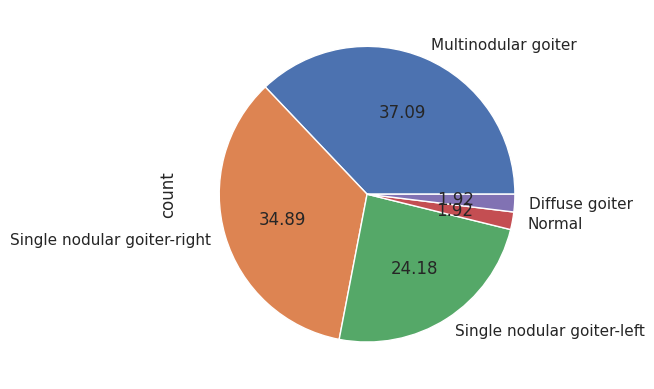

In [ ]:
df["Physical Examination"].value_counts().plot(kind='pie',autopct='%.2f') # autopct is used percentange on graph

In [ ]:
df['Risk'].value_counts()

,count
Risk,
Low,230
Intermediate,102
High,32


<Axes: xlabel='Risk', ylabel='Age'>

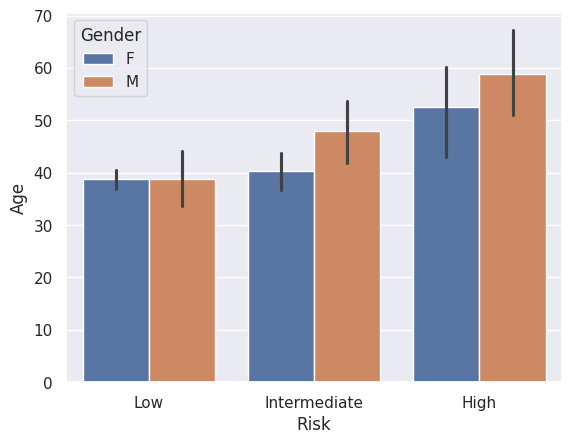

In [ ]:
sns.barplot(df,x="Risk",y="Age",hue="Gender")

<Axes: xlabel='Stage', ylabel='count'>

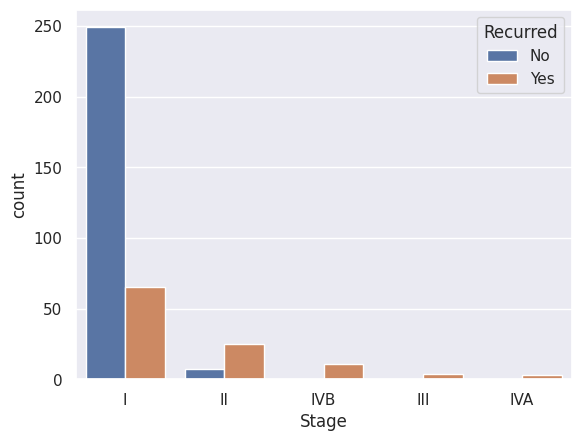

In [ ]:
sns.countplot(df, x="Stage",hue="Recurred")

## **encoding categorical columns**

# **LABEL ENCODER USED**

In [ ]:
# Import LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_Gender = LabelEncoder()
label_Smoking = LabelEncoder()
label_Smoking_History = LabelEncoder()
label_Radiotherapy_History = LabelEncoder()
label_Thyroid_Function = LabelEncoder()
label_Physical_Examination = LabelEncoder()
label_Adenopathy = LabelEncoder()
label_Pathology = LabelEncoder()
label_Focality = LabelEncoder()
label_Cancer_Metastasis = LabelEncoder()
label_Lymph_Nodes	 = LabelEncoder()
label_Stage = LabelEncoder()
label_Tumor = LabelEncoder()
label_Treatment_Response	= LabelEncoder()
label_= LabelEncoder()
label_Recurred = LabelEncoder()


# Fit and transform the label encoding
df['Gender'] = label_Gender.fit_transform(df['Gender'])
df['Smoking'] = label_Smoking.fit_transform(df['Smoking'])
df['Smoking History'] = label_Smoking_History.fit_transform(df['Smoking History'])
df['Radiotherapy History'] = label_Radiotherapy_History.fit_transform(df['Radiotherapy History'])
df['Thyroid Function'] = label_Thyroid_Function.fit_transform(df['Thyroid Function'])
df['Physical Examination'] = label_Physical_Examination.fit_transform(df['Physical Examination'])
df['Adenopathy'] = label_Adenopathy.fit_transform(df['Adenopathy'])
df['Pathology'] = label_Pathology.fit_transform(df['Pathology'])
df['Focality'] = label_Focality.fit_transform(df['Focality'])
df['Cancer Metastasis'] = label_Cancer_Metastasis.fit_transform(df['Cancer Metastasis'])
df['Lymph Nodes'] = label_Lymph_Nodes	.fit_transform(df['Lymph Nodes'])
df['Tumor'] = label_Tumor	.fit_transform(df['Tumor'])
df['Stage'] = label_Stage.fit_transform(df['Stage'])
df['Treatment Response'] = label_Treatment_Response.fit_transform(df['Treatment Response'])
df['Recurred'] = label_Recurred.fit_transform(df['Recurred'])

In [ ]:
df['Risk'].value_counts()

,count
Risk,
Low,230
Intermediate,102
High,32


## **ORDINAL ENCODING**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order of categories for the 'Risk' column
categories = [['Low', 'Intermediate', 'High']]  # Specify the categories in the desired order

# Initialize OrdinalEncoder with specified categories
oe = OrdinalEncoder(categories=categories)

# Fit and transform the ordinal encoding
df['Risk'] = oe.fit_transform(df[['Risk']])


In [ ]:
df.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,0.0,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,0.0,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,0.0,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,0.0,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,0.0,0,0,0,0,1,0


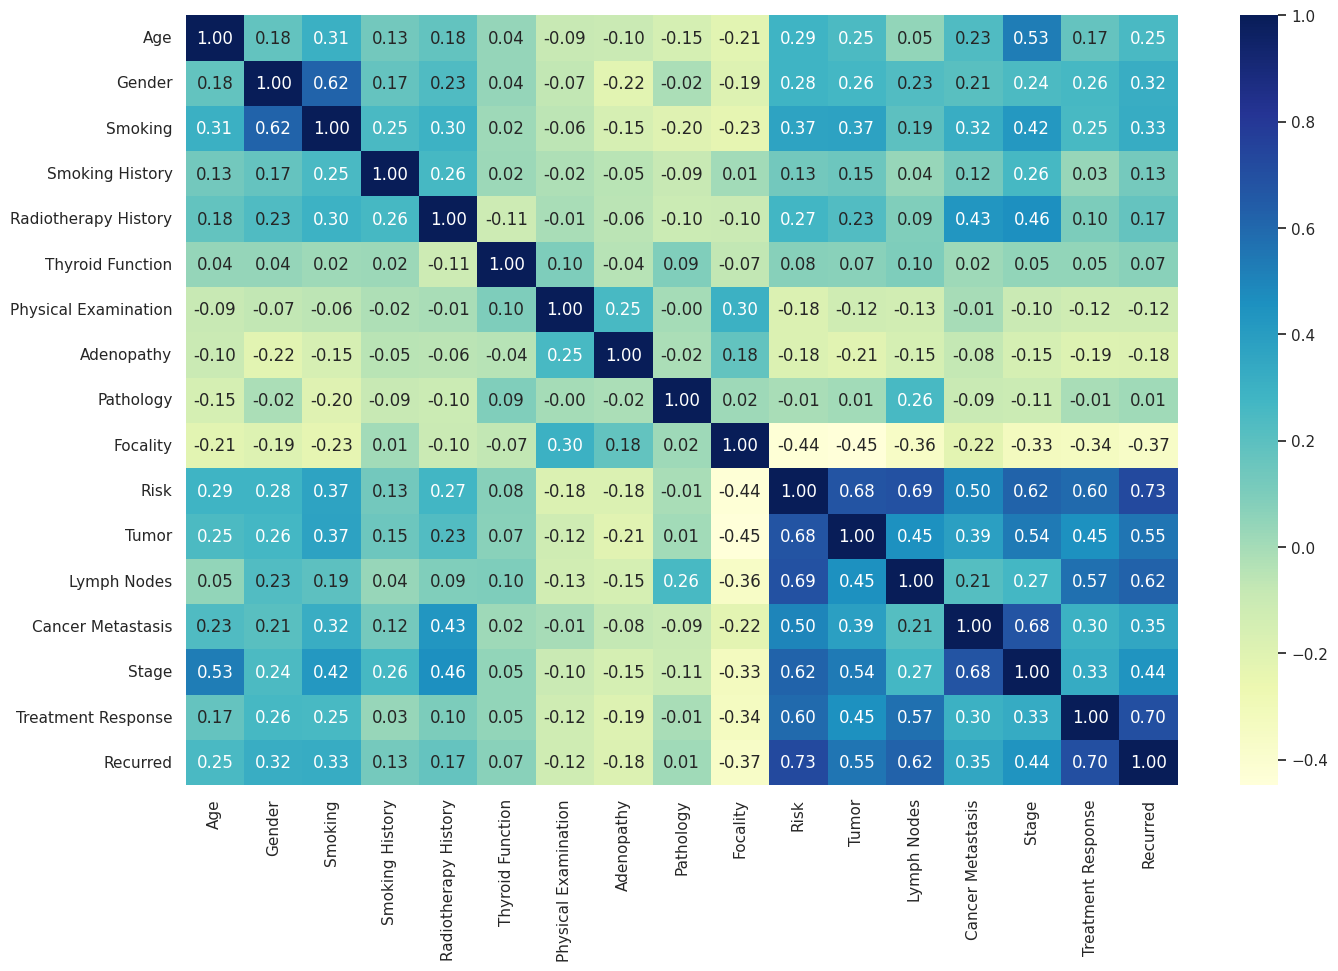

In [ ]:
plt.subplots(figsize=(16, 10))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

<Axes: xlabel='Age'>

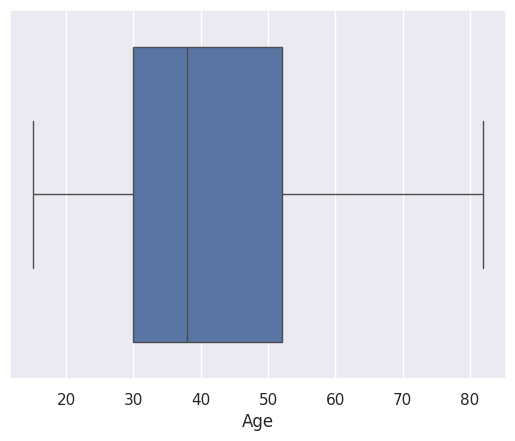

In [ ]:
sns.boxplot(x=df['Age'])

In [ ]:
# Step 2: Identify features and target variable
x = df.drop('Recurred', axis=1)  # Features
y = df['Recurred']               # Target variable

In [ ]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [ ]:
# prompt: suppose I give a new row of data. how would you fit the new StandardScaler()

import numpy as np

# Assuming 'new_row_data' is a list or numpy array representing the new row
# Make sure the new_row_data has the same number of features as the original data used to fit the scaler
new_row_data = np.array([[1, 2, 3, 4, 5, 6,7, 8, 9, 10,11,12, 13,14, 15, 16, 17]]) # Example new data

# Reshape the new row data if it's a 1D array
# new_row_data = new_row_data.reshape(1, -1)

# Use the existing 'pre_process' scaler to transform the new row
new_row_scaled = pre_process.fit_transform(x)

new_row_scaled

array([[-0.93178003, -0.49226093, -0.39440532, ..., -0.22808578,
        -0.32336336,  0.4252397 ],
       [-0.47406352, -0.49226093, -0.39440532, ..., -0.22808578,
        -0.32336336, -0.64967176],
       [-0.73561581, -0.49226093, -0.39440532, ..., -0.22808578,
        -0.32336336, -0.64967176],
       ...,
       [ 2.01068323,  2.03144298,  2.53546276, ...,  4.38431548,
         4.73918562,  1.50015115],
       [ 1.29141443,  2.03144298,  2.53546276, ..., -0.22808578,
         3.47354837,  1.50015115],
       [ 1.68374286,  2.03144298,  2.53546276, ..., -0.22808578,
         3.47354837,  1.50015115]])

In [ ]:
# prompt: dump x_transform into a sav file and download

import joblib

joblib.dump(pre_process, 'x_transform_thyroid.sav')
from google.colab import files
files.download('x_transform_thyroid.sav')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = .10, random_state = 101)

In [ ]:
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 91.89 %


Precision: 0.91
Recall: 0.83
------------------------------------------------------------
[[24  1]
 [ 2 10]]


<Axes: >

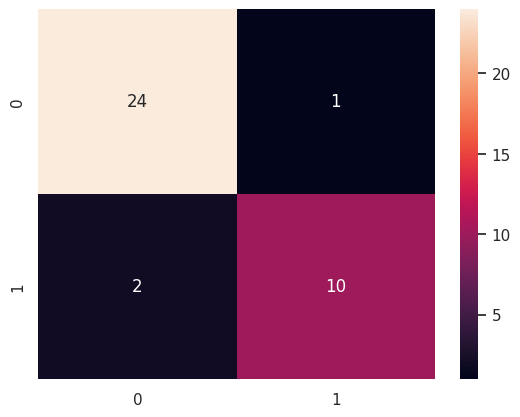

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_log_reg)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")

# **Decision Tree**


In [ ]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)

Decision Tree Classifier


DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_Dtree = Dtree.predict(x_test)
# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 94.59 %


Precision: 0.92
Recall: 0.92
------------------------------------------------------------


<Axes: >

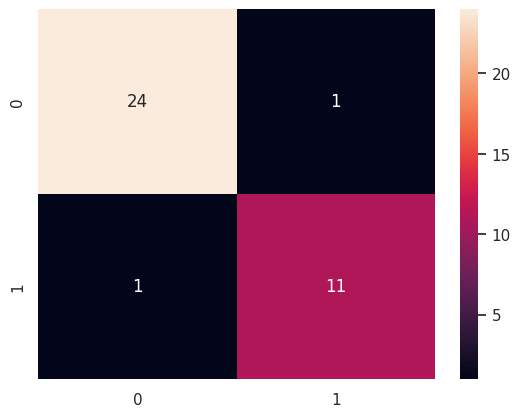

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_Dtree)
recall = recall_score(y_test, y_pred_Dtree)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_Dtree)

sns.heatmap(confusion, annot=True, fmt="d")

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 97.3 %


Precision: 1.00
Recall: 0.92
------------------------------------------------------------


<Axes: >

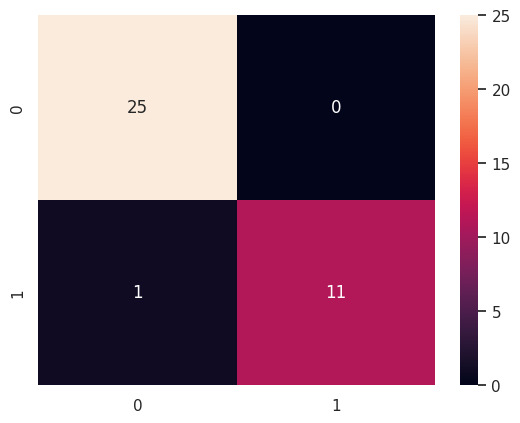

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(confusion, annot=True, fmt="d")

## **CATBOOST**

In [ ]:
# run the catboost classifier
model = CatBoostClassifier(iterations=10,
                           learning_rate=0.1,
                           depth=3,
                           loss_function='Logloss',
                           eval_metric='Accuracy',
                           random_seed=42,
                           verbose=False)

# train the model without specifying cat_features
model.fit(x_train, y_train)

# predictions
y_pred_cat = model.predict(x_test)

# evaluate the model
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_cat) * 100,2}')


Accuracy Score: (97.2972972972973, 2)


Precision: 1.00
Recall: 0.92
------------------------------------------------------------


<Axes: >

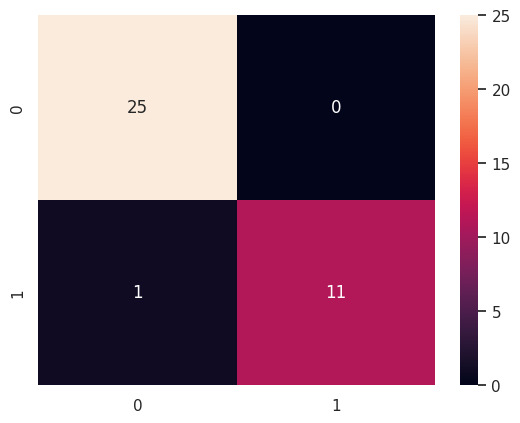

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_cat)
recall = recall_score(y_test, y_pred_cat)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(confusion, annot=True, fmt="d")

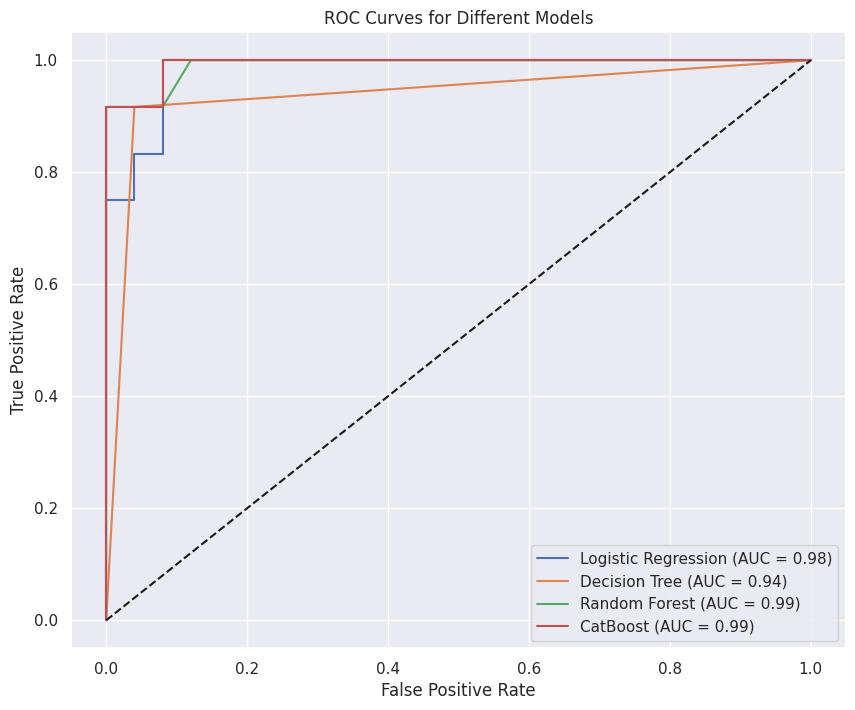

,Model,AUC
3,CatBoost,0.993333
2,Random Forest,0.991667
0,Logistic Regression,0.983333
1,Decision Tree,0.938333


In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming you have y_test and y_pred_proba for each model
# y_pred_proba should be the probability of the positive class (e.g., y_pred_proba = model.predict_proba(x_test)[:, 1])

models = {
    'Logistic Regression': (y_test, log_reg.predict_proba(x_test)[:, 1]),
    'Decision Tree': (y_test, Dtree.predict_proba(x_test)[:, 1]),
    'Random Forest': (y_test, rfc.predict_proba(x_test)[:, 1]),
    'CatBoost': (y_test, model.predict_proba(x_test)[:, 1])
}

plt.figure(figsize=(10, 8))

for model_name, (y_true, y_pred_proba) in models.items():
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()

# Compare models and sort by score (e.g., AUC)
model_scores = {}
for model_name, (y_true, y_pred_proba) in models.items():
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    model_scores[model_name] = roc_auc

model_scores_df = pd.DataFrame({'Model': list(model_scores.keys()), 'AUC': list(model_scores.values())})
model_scores_df = model_scores_df.sort_values('AUC', ascending=False)
model_scores_df


In [ ]:
import pickle
from google.colab import files

# Save the CatBoost model to a .sav file
filename = 'catboost_model.sav'
pickle.dump(model, open(filename, 'wb'))

# Download the saved model file
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: load the sav file in a new python script and give a row of sample data in pandas df; transform the input; predict
# note: you don't have Thyroid_Diff.csv now

import pandas as pd
import pickle

# Load the saved CatBoost model
filename = 'catboost_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Sample input data (replace with your actual data)
# Ensure the order and type of columns match the model's training data
sample_data = pd.DataFrame({
    'Age': [50],
    'Gender': [0],
    'Smoking': [1],
    'Smoking History': [1],
    'Radiotherapy History': [0],
    'Thyroid Function': [0],
    'Physical Examination': [0],
    'Adenopathy': [1],
    'Pathology': [0],
    'Focality': [0],
    'Cancer Metastasis': [0],
    'Lymph Nodes': [0],
    'Tumor': [0],
    'Stage': [0],
    'Treatment Response': [0],
    'Risk': [1.0]
})

# Preprocess the sample data similar to how you preprocessed the training data
# This may involve scaling or encoding
x_sample = sample_data


# Make predictions using the loaded model
y_pred_sample = loaded_model.predict(x_sample)

# Print the predictions
print(f"Predictions: {y_pred_sample}")

# Print sample data
print(sample_data.head())

# Function to transform input data
def transform_input(input_data):
    # Implement the same preprocessing steps used for training data
    # This may involve scaling or encoding
    transformed_data = input_data  # Replace with your preprocessing steps
    return transformed_data

# Example usage
input_data = pd.DataFrame({
    'Age': [50],
    'Gender': [0],
    'Smoking': [1],
    'Smoking History': [1],
    'Radiotherapy History': [0],
    'Thyroid Function': [0],
    'Physical Examination': [0],
    'Adenopathy': [1],
    'Pathology': [0],
    'Focality': [0],
    'Cancer Metastasis': [0],
    'Lymph Nodes': [0],
    'Tumor': [0],
    'Stage': [0],
    'Treatment Response': [0],
    'Risk': [1.0]
})

transformed_input = transform_input(input_data)
prediction = loaded_model.predict(transformed_input)
print(f"Prediction: {prediction}")


Predictions: [1]
   Age  Gender  Smoking  Smoking History  Radiotherapy History  \
0   50       0        1                1                     0   

   Thyroid Function  Physical Examination  Adenopathy  Pathology  Focality  \
0                 0                     0           1          0         0   

   Cancer Metastasis  Lymph Nodes  Tumor  Stage  Treatment Response  Risk  
0                  0            0      0      0                   0   1.0  
Prediction: [1]
